## Q3##
"C:\Users\Sai\Desktop\Q3\02_01_District_wise_crimes_committed_against_SC_2001_2012.csv"
"C:\Users\Sai\Desktop\Q3\02_District_wise_crimes_committed_against_ST_2001_2012.csv"
"C:\Users\Sai\Desktop\Q3\03_District_wise_crimes_committed_against_children_2001_2012.csv"
"C:\Users\Sai\Desktop\Q3\01_District_wise_crimes_committed_IPC_2001_2012.csv"
 Above files are used for analysis.

Steps:
pandas is used for data manipulation and analysis.
matplotlib.pyplot is used for visualization.
Each dataset represents different types of crimes committed across Indian districts.
The files are loaded into separate pandas dataframes
Renaming columns for consistent naming across all datasets
Removes rows where district is labeled as "Total", ensuring that we do not include aggregated values.
Drops total crime columns, which contain pre-summed data that is not useful for our analysis
Merges all datasets into one dataframe (df_combined) while maintaining individual crime records per city.
Calculates total crimes by summing all crime columns (excluding "State" and "District").
Groups data by "State" and "District", summing up all crimes for each district
Function get_top_cities(state_df):
Sorts districts within a state based on Total Crimes in descending order.
Selects the top 7 cities with the highest crime rates.
groupby("State").apply(get_top_cities):
Applies the function to each state, ensuring we get the top 7 crime-prone cities per state
Loops through each state and plots a bar chart:
X-axis: Top 7 districts (crime-affected cities).
Y-axis: Total crime count.
Bar Color: Sky blue.
Title: Clearly mentions the state name

C:\Users\Sai\AppData\Local\Temp\ipykernel_2424\2452022244.py:45: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_cities_per_state = df_grouped.groupby("State").apply(get_top_cities).reset_index(drop=True)


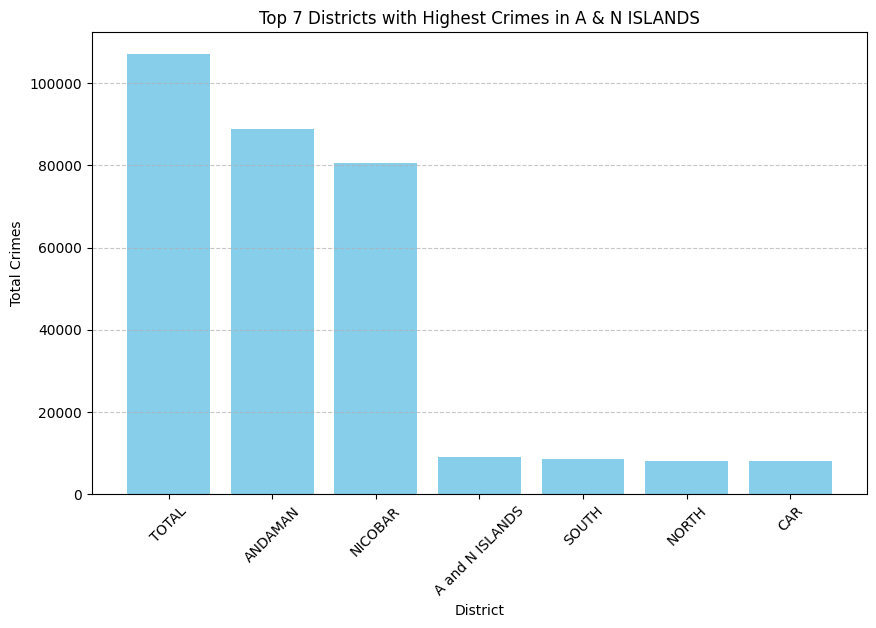

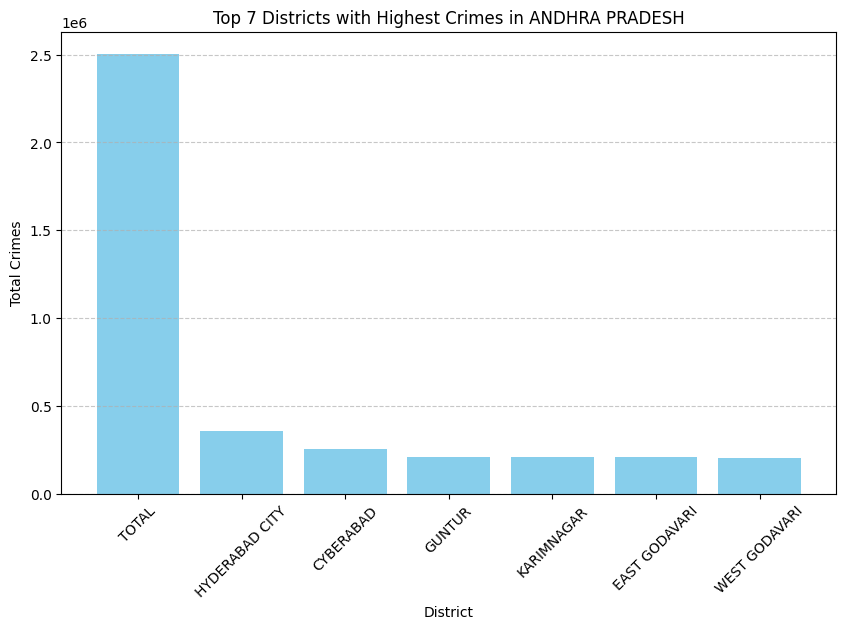

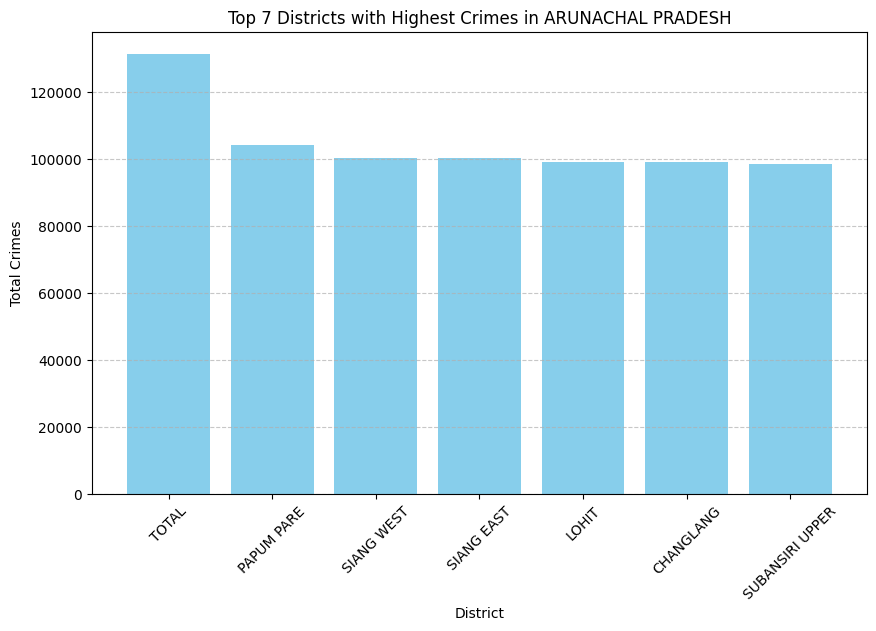

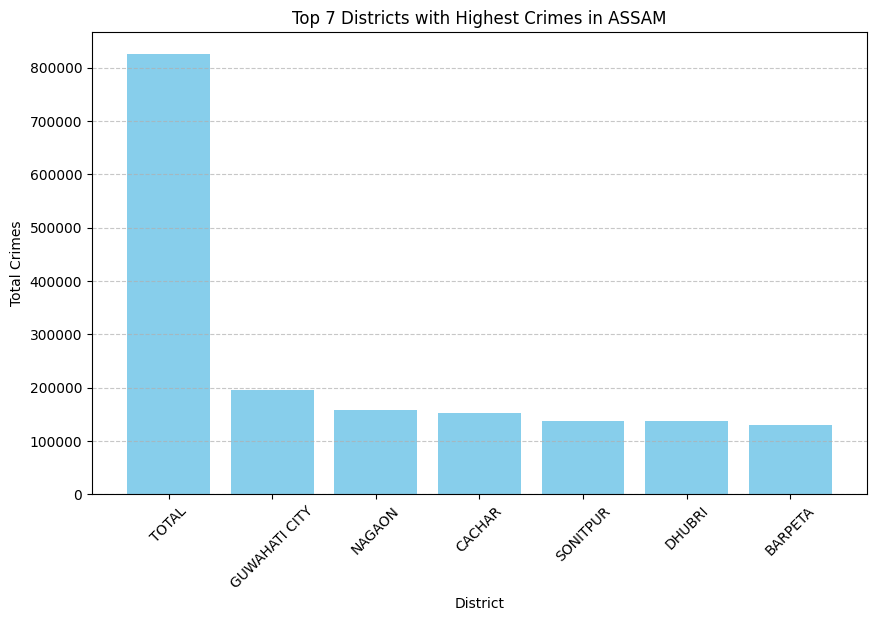

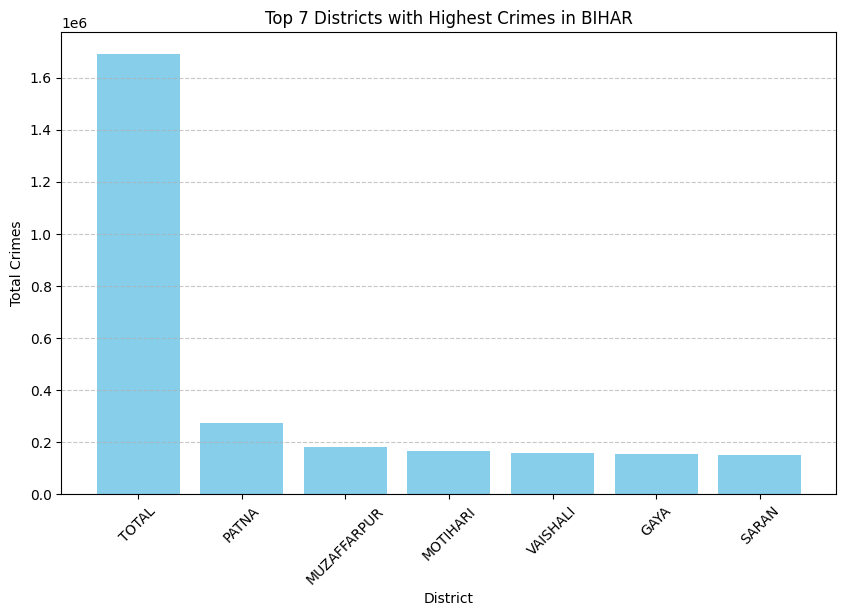

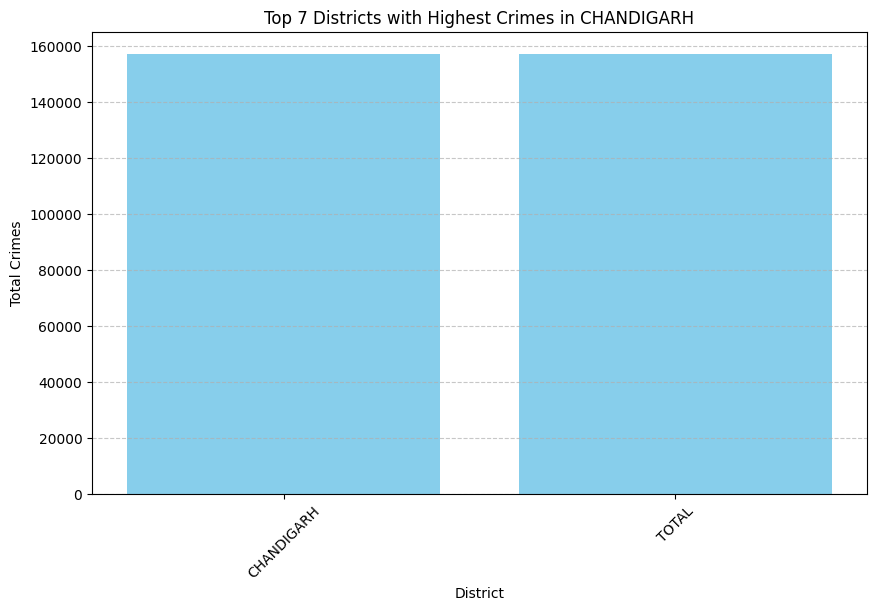

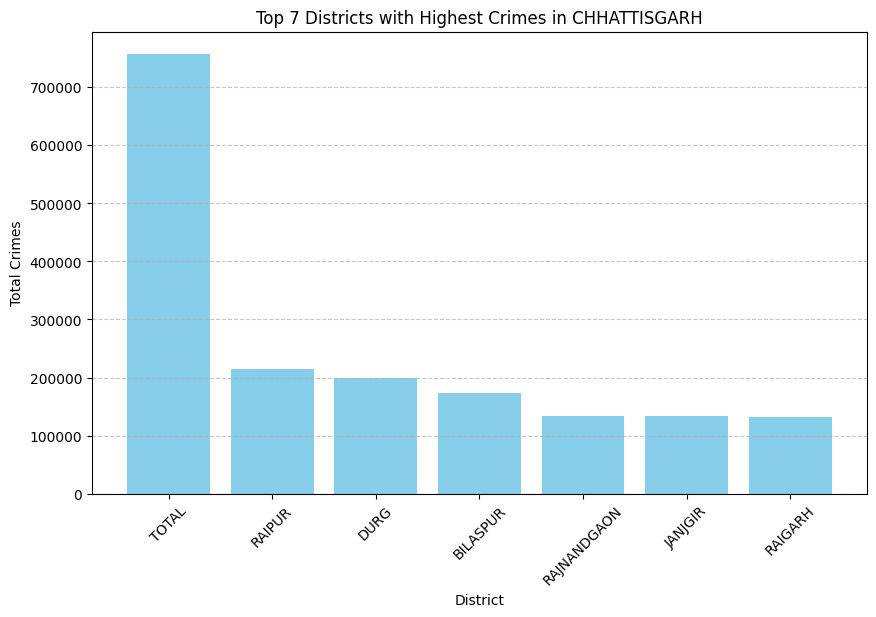

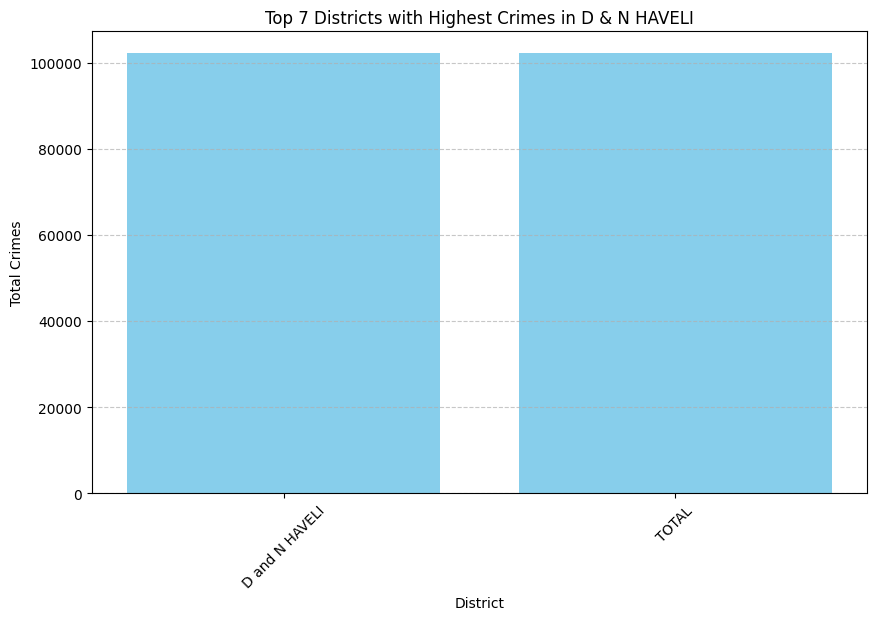

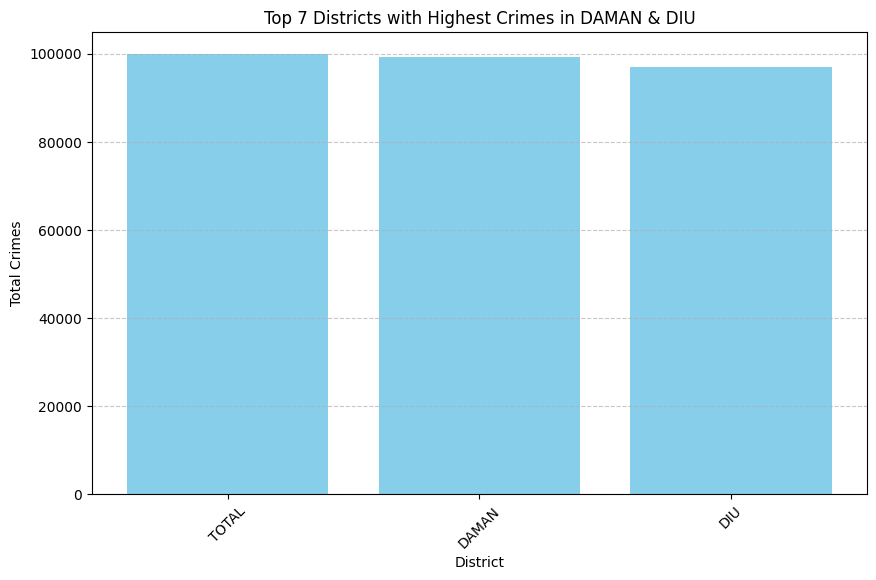

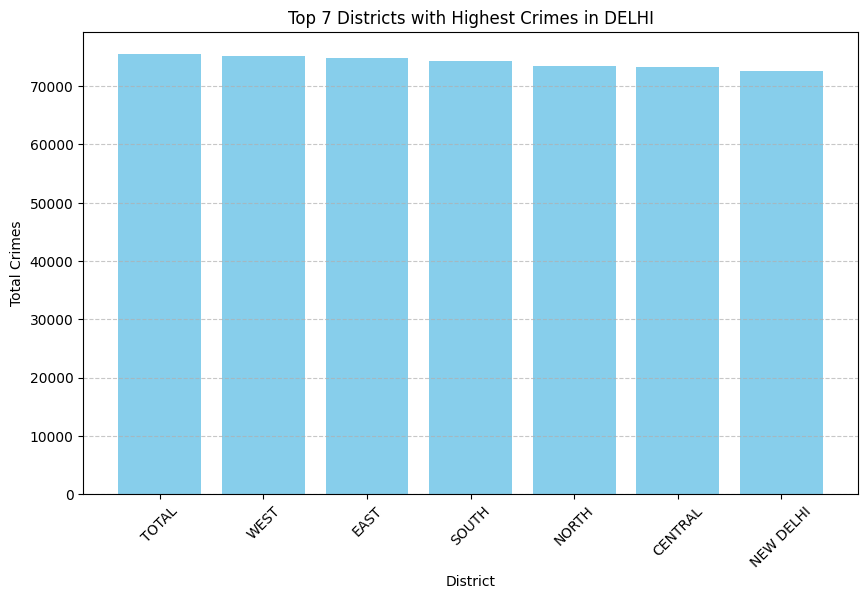

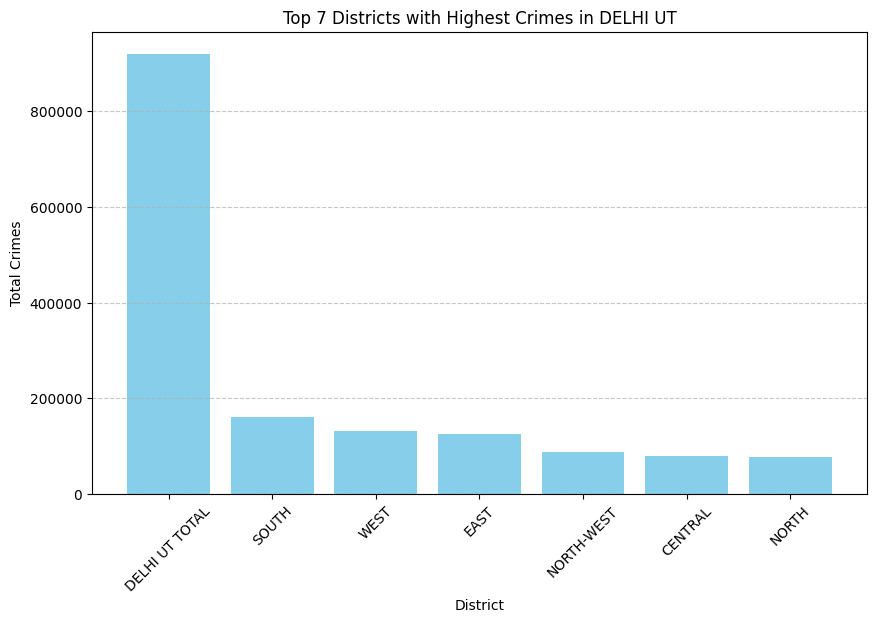

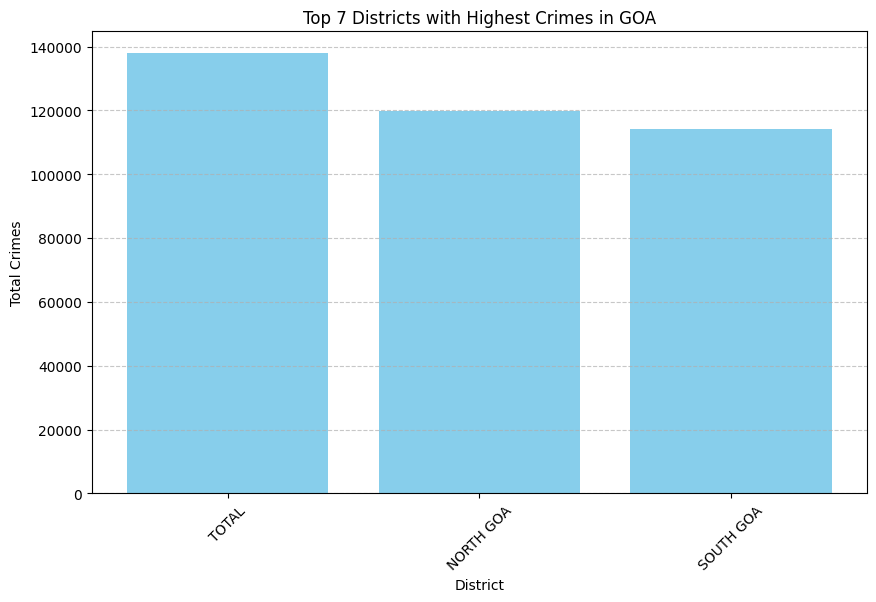

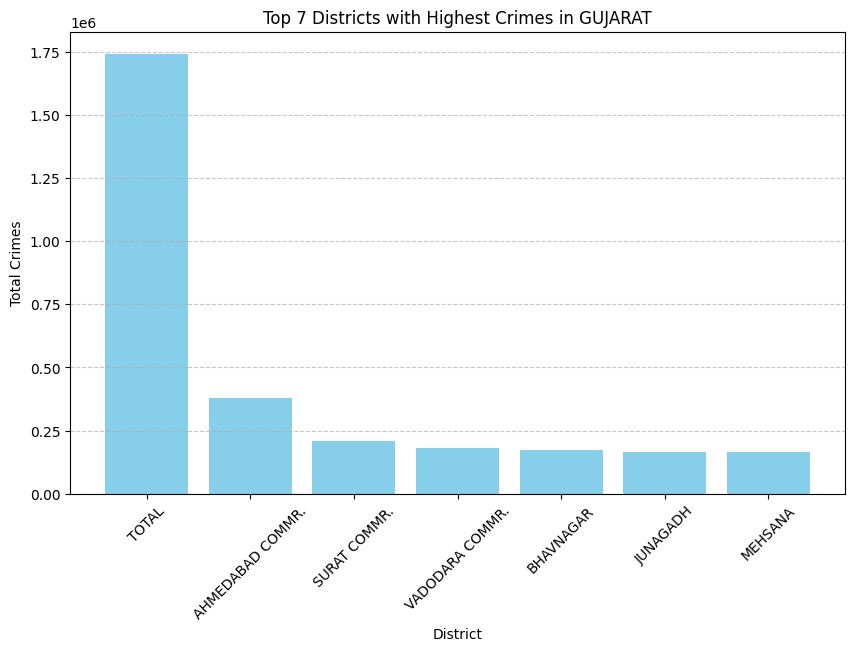

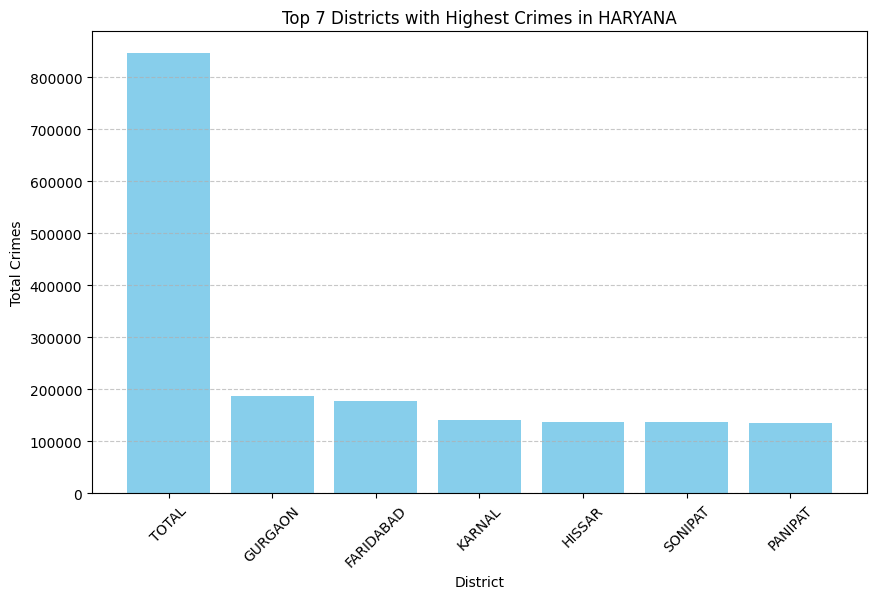

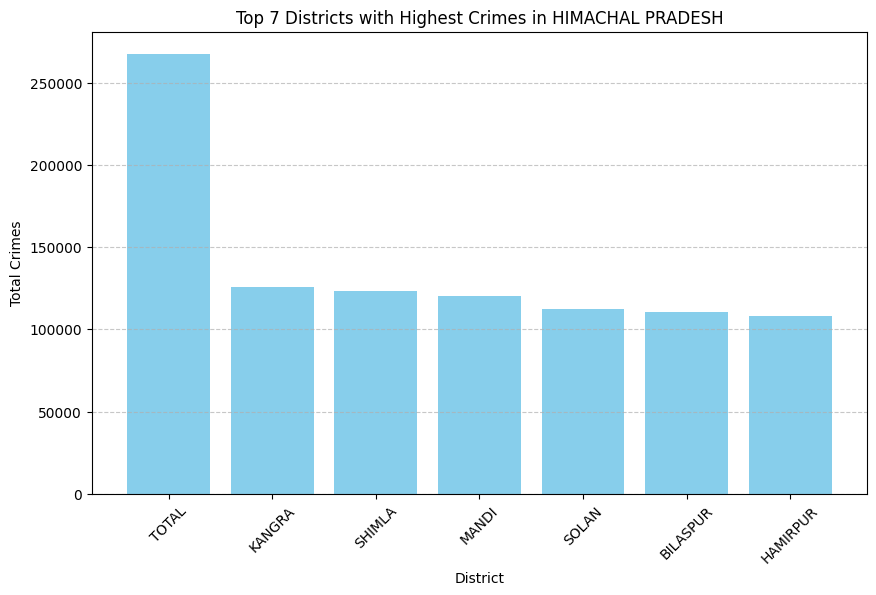

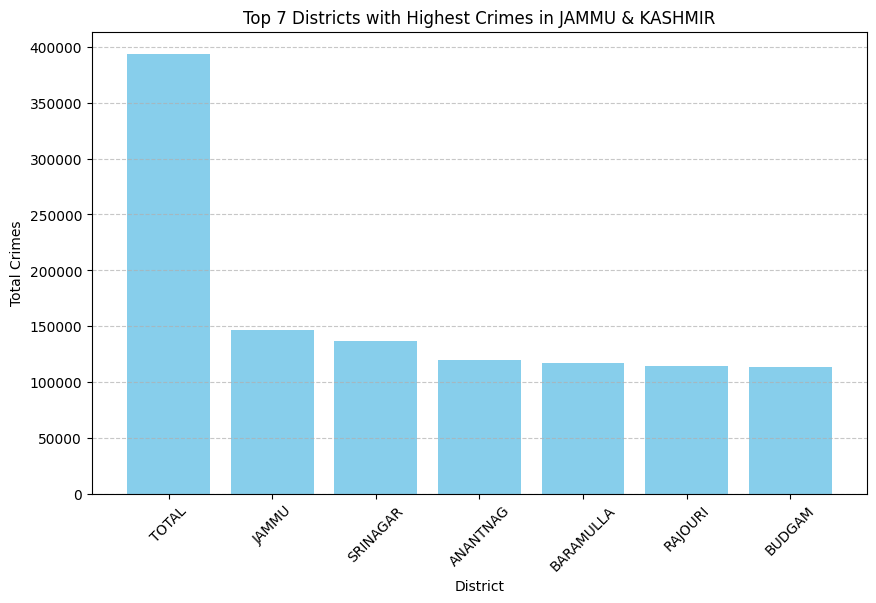

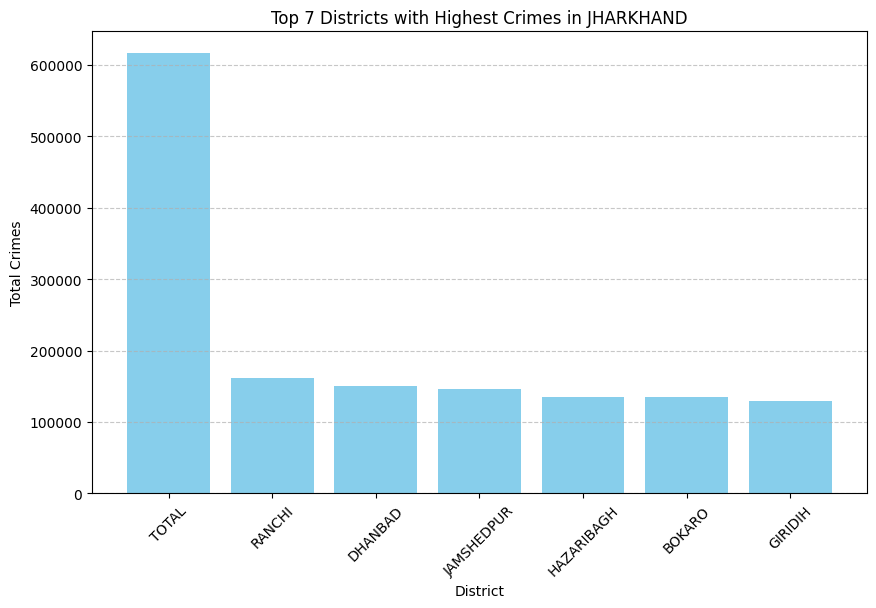

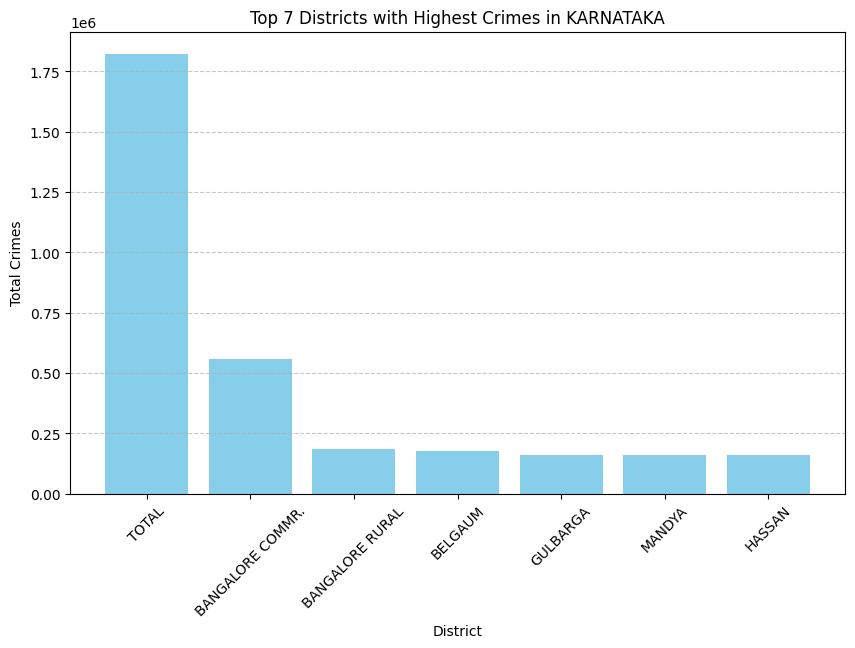

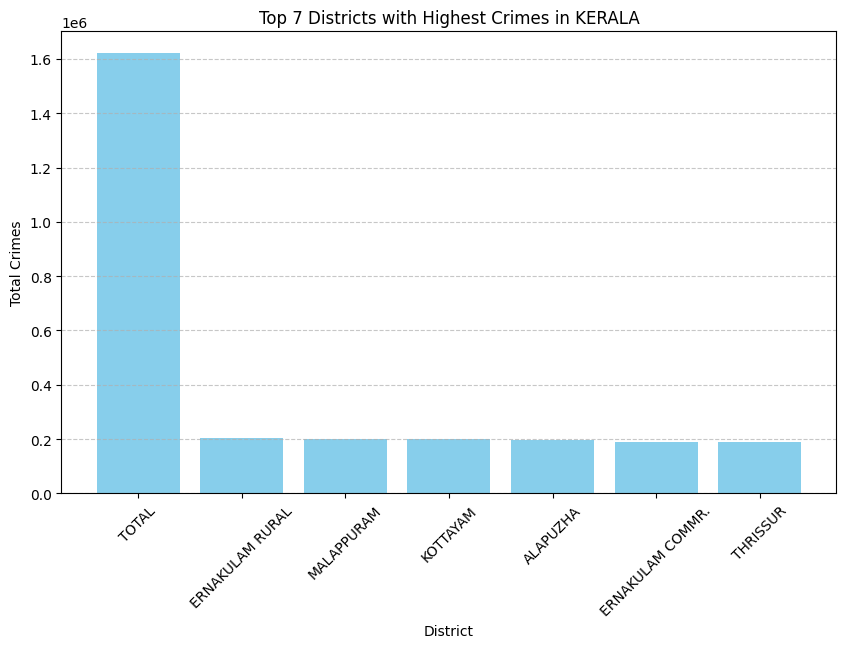

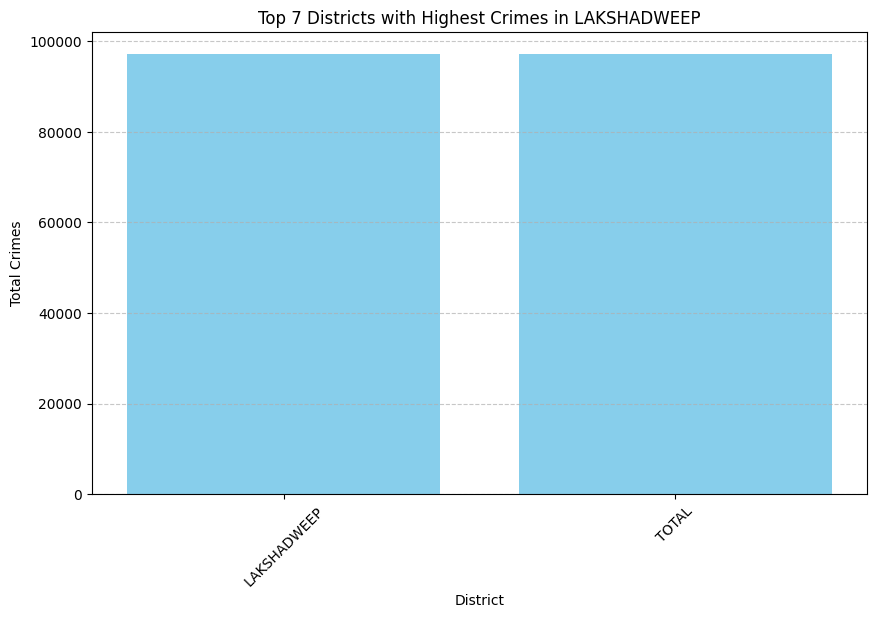

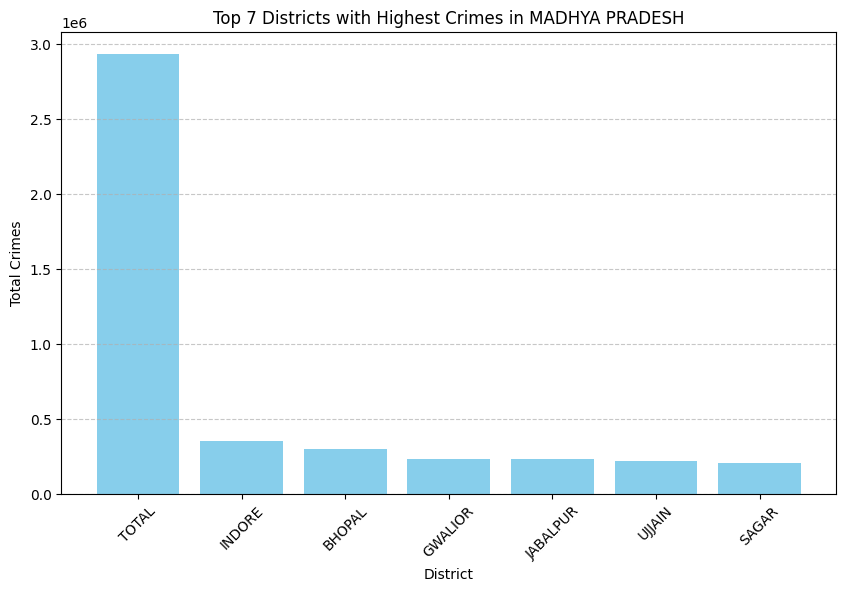

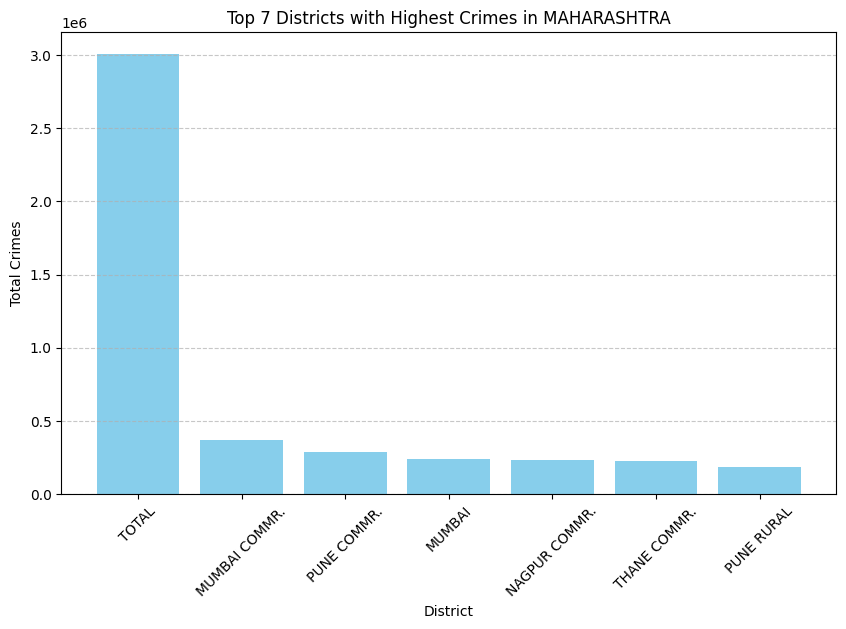

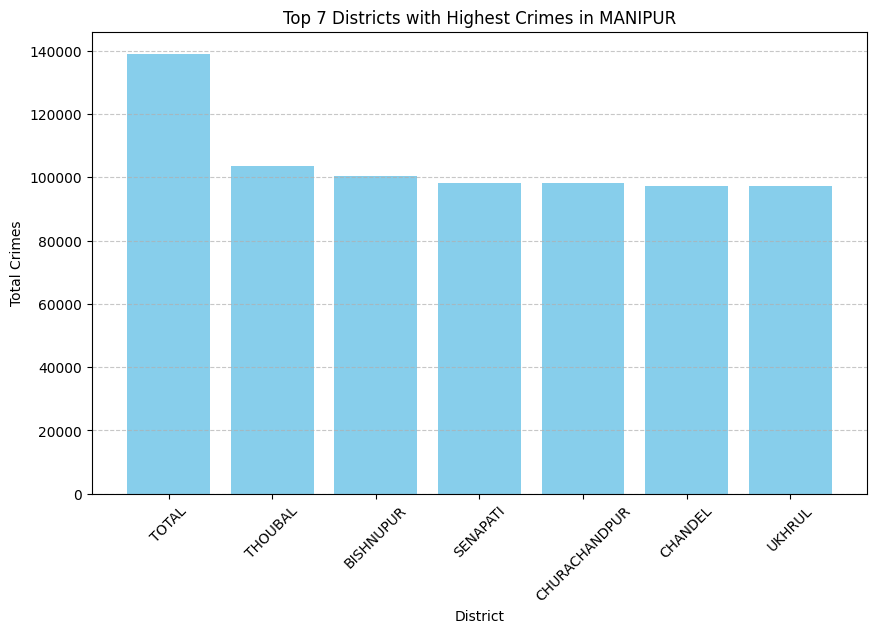

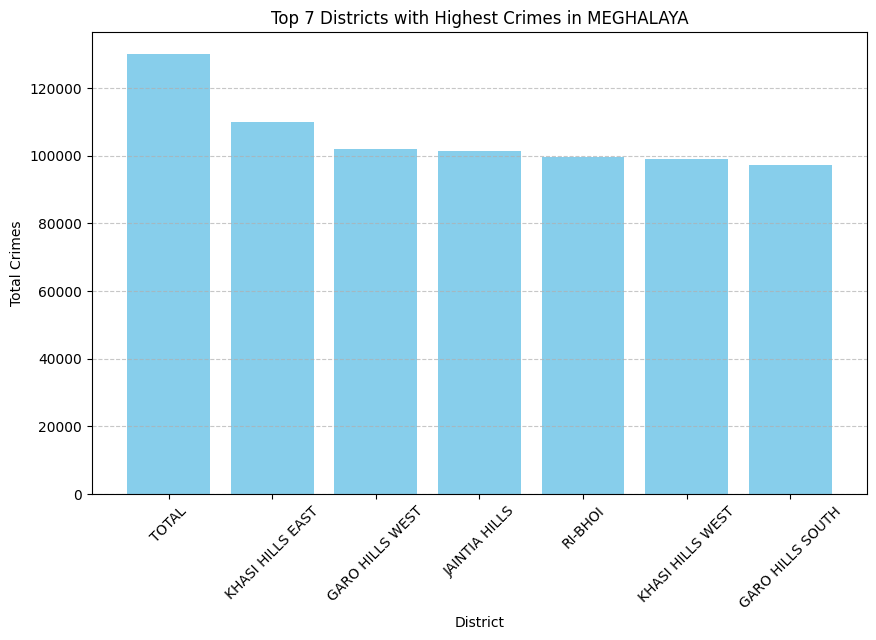

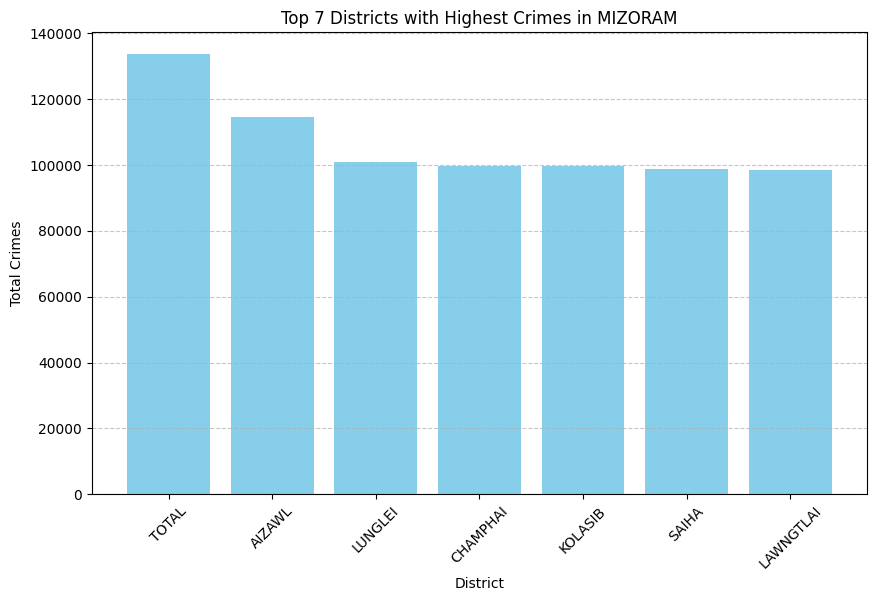

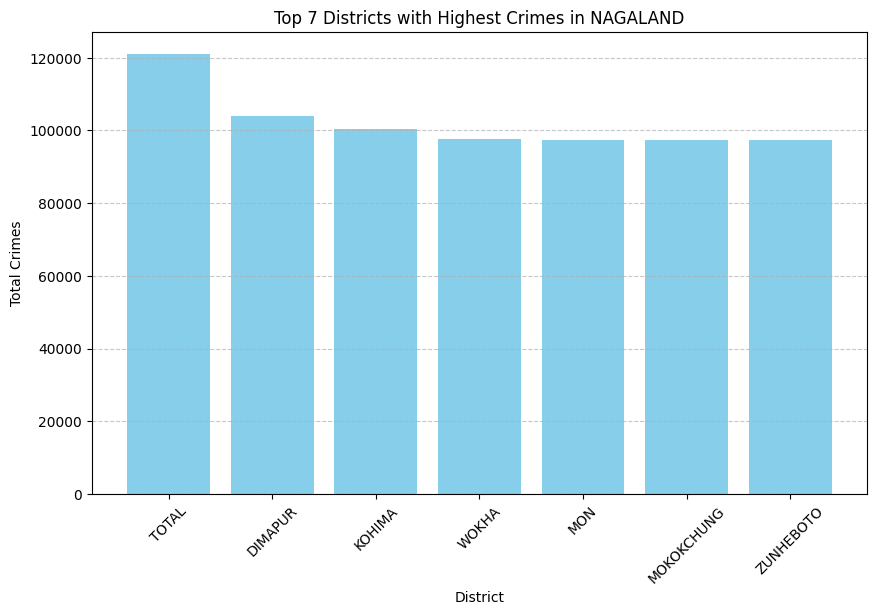

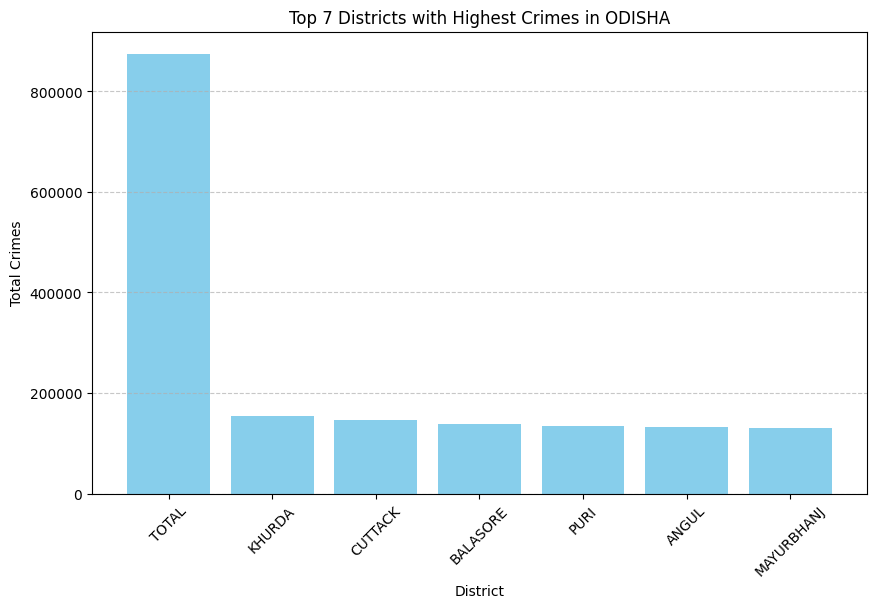

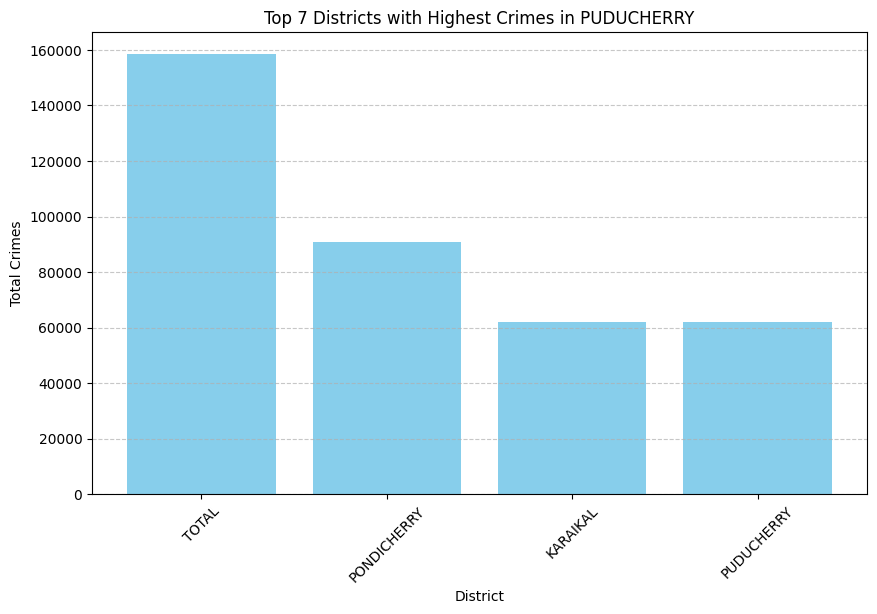

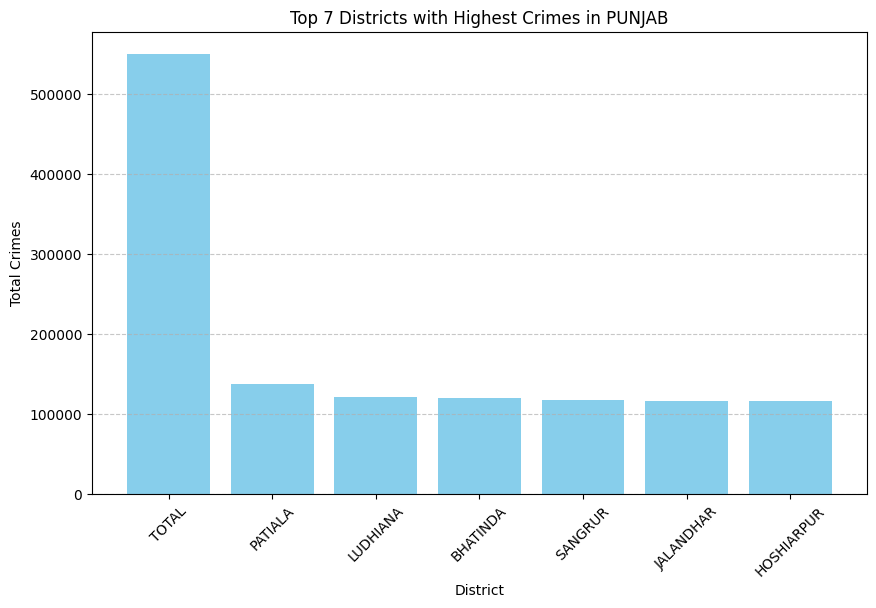

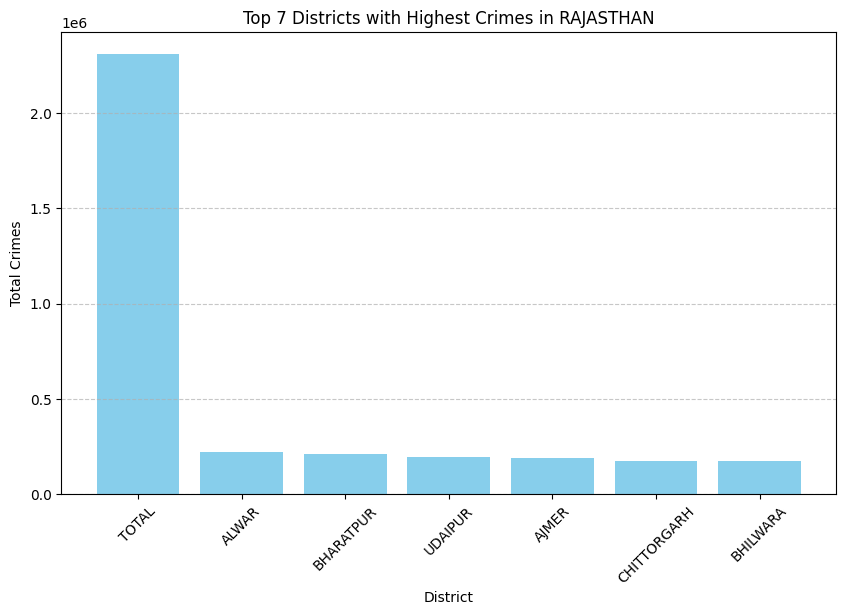

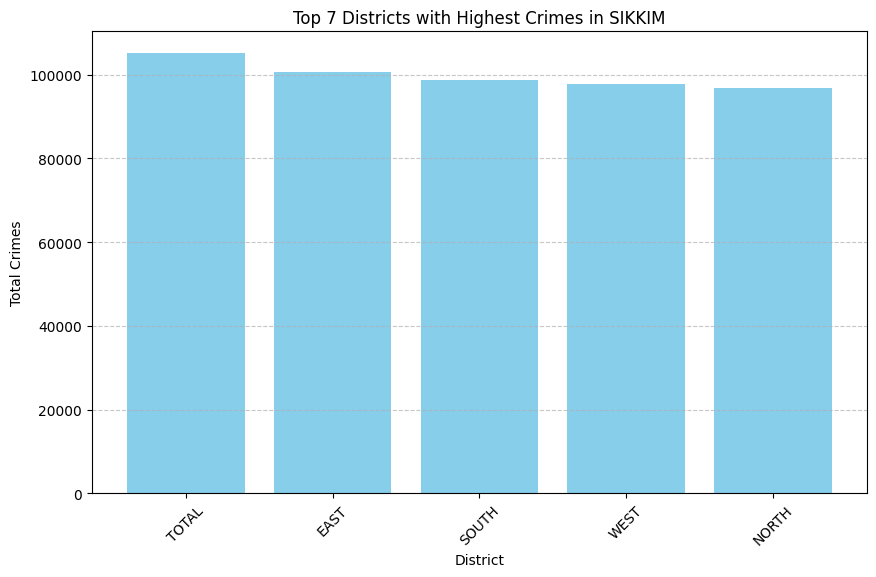

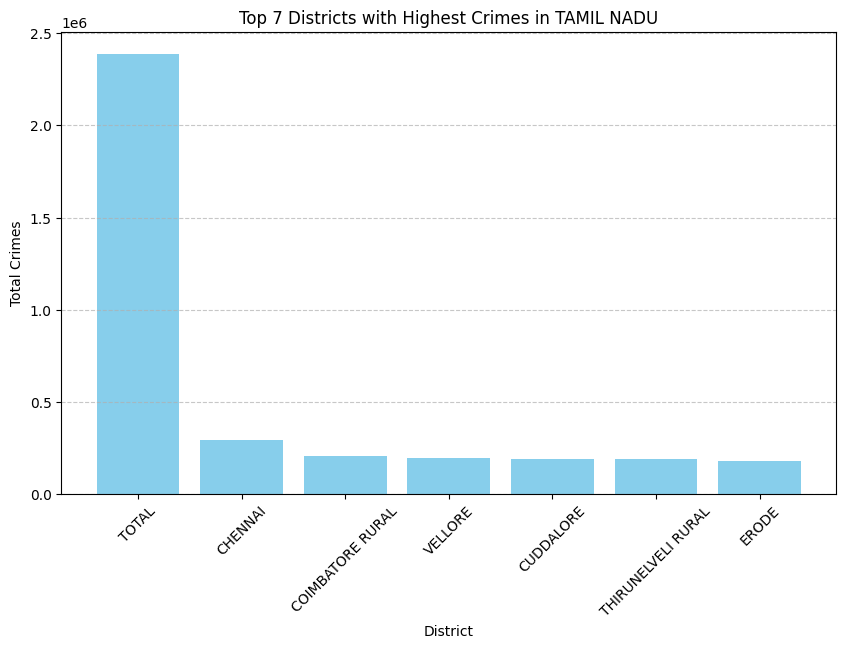

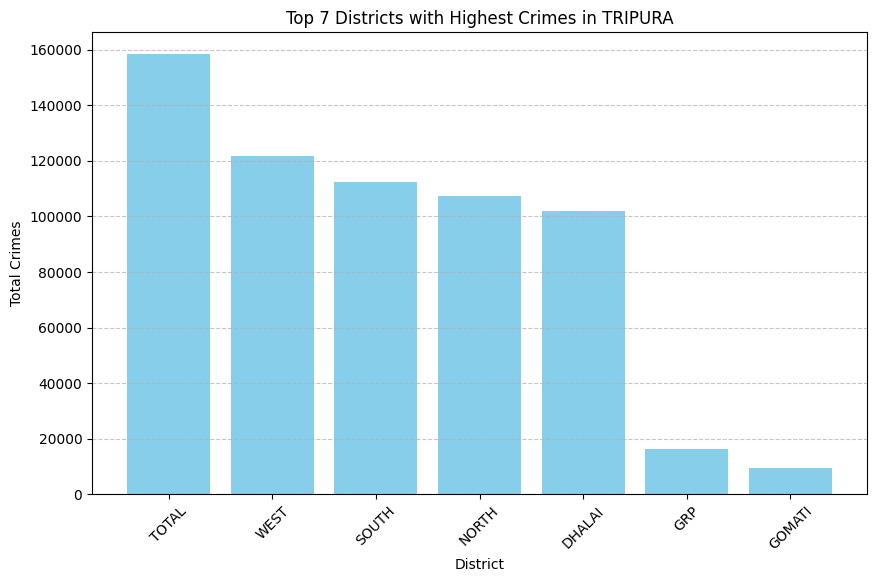

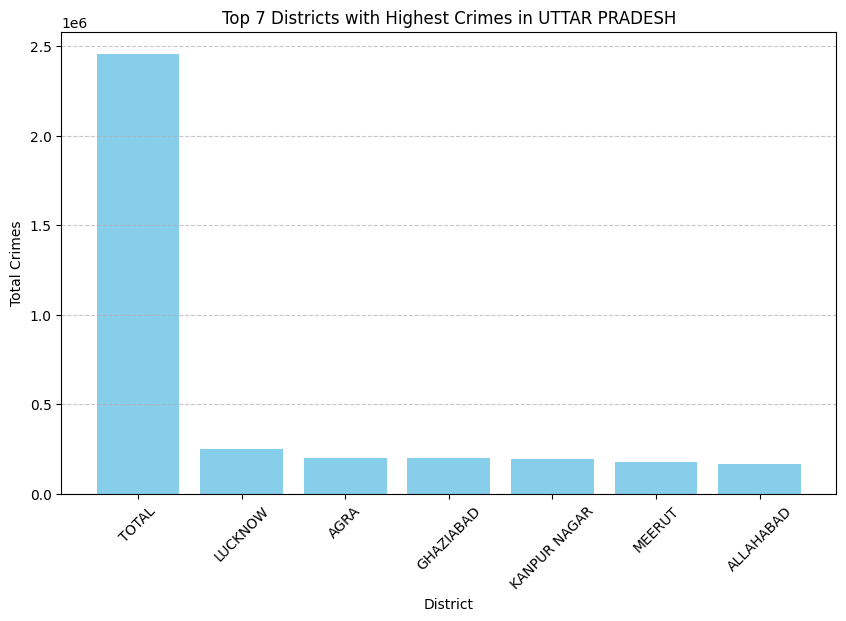

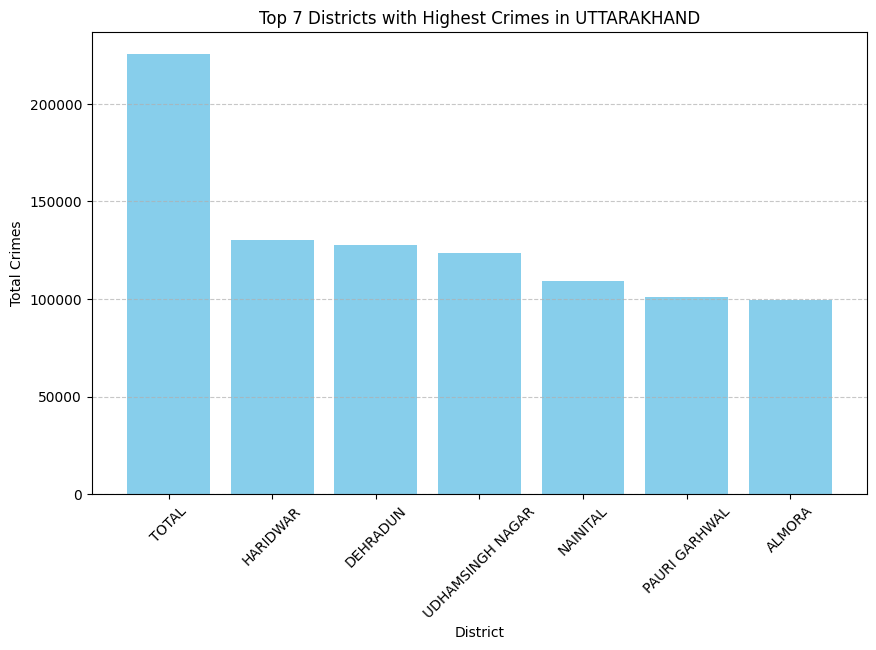

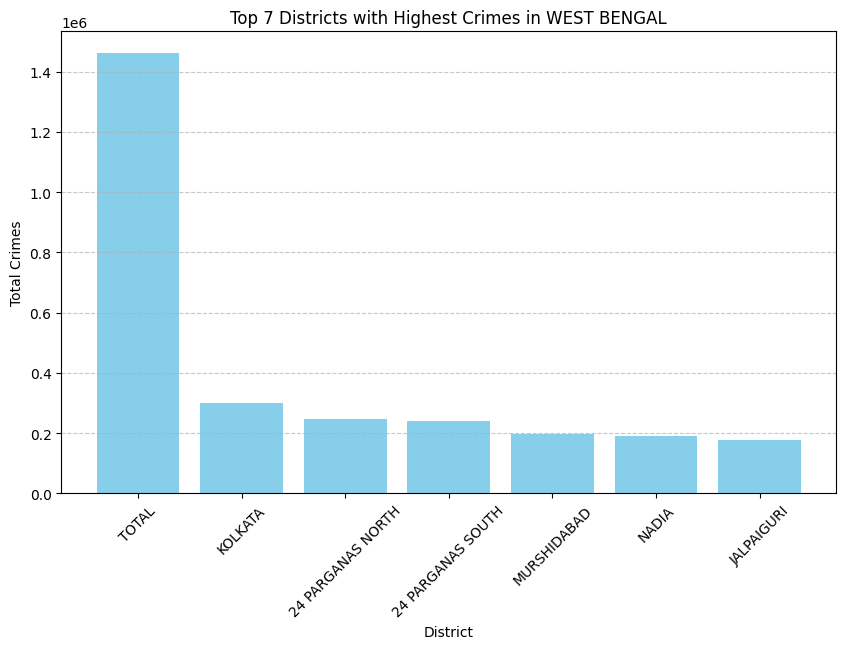

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


file_paths = {
    "IPC Crimes":r"C:\Users\Sai\Desktop\Q3\01_District_wise_crimes_committed_IPC_2001_2012.csv",
    "Crimes Against SC":r"C:\Users\Sai\Desktop\Q3\02_01_District_wise_crimes_committed_against_SC_2001_2012.csv",
    "Crimes Against Children":r"C:\Users\Sai\Desktop\Q3\02_District_wise_crimes_committed_against_ST_2001_2012.csv",
    "Crimes Against ST":r"C:\Users\Sai\Desktop\Q3\03_District_wise_crimes_committed_against_children_2001_2012.csv"
}

df_ipc = pd.read_csv(file_paths["IPC Crimes"])
df_sc = pd.read_csv(file_paths["Crimes Against SC"])
df_children = pd.read_csv(file_paths["Crimes Against Children"])
df_st = pd.read_csv(file_paths["Crimes Against ST"])

df_ipc.rename(columns={"DISTRICT": "District", "STATE/UT": "State"}, inplace=True)
df_sc.rename(columns={"DISTRICT": "District", "STATE/UT": "State"}, inplace=True)
df_children.rename(columns={"DISTRICT": "District", "STATE/UT": "State"}, inplace=True)
df_st.rename(columns={"DISTRICT": "District", "STATE/UT": "State"}, inplace=True)

df_ipc = df_ipc[df_ipc['District'] != 'Total']
df_sc = df_sc[df_sc['District'] != 'Total']
df_children = df_children[df_children['District'] != 'Total']
df_st = df_st[df_st['District'] != 'Total']

df_ipc.drop(columns=['TOTAL IPC CRIMES'], errors='ignore', inplace=True)
df_sc.drop(columns=['Total'], errors='ignore', inplace=True)
df_children.drop(columns=['Total'], errors='ignore', inplace=True)
df_st.drop(columns=['Total'], errors='ignore', inplace=True)

df_combined = pd.concat([df_ipc, df_sc, df_children, df_st], ignore_index=True)

df_combined['Total_Crimes'] = df_combined.drop(columns=['State', 'District']).sum(axis=1, numeric_only=True)
df_grouped = df_combined.groupby(["State", "District"])['Total_Crimes'].sum().reset_index()


def get_top_cities(state_df):
    return state_df.sort_values(by="Total_Crimes", ascending=False).head(7)

top_cities_per_state = df_grouped.groupby("State").apply(get_top_cities).reset_index(drop=True)


states = top_cities_per_state["State"].unique()
for state in states:
    state_data = top_cities_per_state[top_cities_per_state["State"] == state]
    plt.figure(figsize=(10, 6))
    plt.bar(state_data["District"], state_data["Total_Crimes"], color='skyblue')
    plt.xlabel("District")
    plt.ylabel("Total Crimes")
    plt.title(f"Top 7 Districts with Highest Crimes in {state}")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()